# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 4__

__Nombres de los estudiantes: Carlos Tardón Rubio y Carlos Morán Alfonso__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [42]:
random_state = 50
import pandas as pd
import numpy as np
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.cluster as skc
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [43]:
df_world = pd.read_csv('countries_of_the_world.csv').drop(columns=['Region']) ## Construimos el DataFrame y eliminamos la columna Región
df_world ## mostramos el DF original y observamos que hay filas con valores NaN

Country  Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0       Afghanistan     31056997          647500                        48.0   
1           Albania      3581655           28748                       124.6   
2           Algeria     32930091         2381740                        13.8   
3    American Samoa        57794             199                       290.4   
4           Andorra        71201             468                       152.1   
..               ...         ...             ...                         ...   
222       West Bank      2460492            5860                       419.9   
223  Western Sahara       273008          266000                         1.0   
224           Yemen     21456188          527970                        40.6   
225          Zambia     11502010          752614                        15.3   
226        Zimbabwe     12236805          390580                        31.3   

     Coastline (coast/area ratio)  Net migration  \
0                            0.00          23.06   
1                            1.26          -4.93   
2                            0.04          -0.39   
3                           58.29         -20.71   
4                            0.00           6.60   
..                            ...            ...   
222                          0.00           2.98   
223                          0.42            NaN   
224                          0.36           0.00   
225                          0.00           0.00   
226                          0.00           0.00   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                                163.07               700.0          36.0   
1                                 21.52              4500.0          86.5   
2                                 31.00              6000.0          70.0   
3                                  9.27              8000.0          97.0   
4                                  4.05             19000.0         100.0   
..                                  ...                 ...           ...   
222                               19.62               800.0           NaN   
223                                 NaN                 NaN           NaN   
224                               61.50               800.0          50.2   
225                               88.29               800.0          80.6   
226                               67.69              1900.0          90.7   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0                  3.2       12.13       0.22      87.65      1.0      46.60   
1                 71.2       21.09       4.42      74.49      3.0      15.11   
2                 78.1        3.22       0.25      96.53      1.0      17.14   
3                259.5       10.00      15.00      75.00      2.0      22.46   
4                497.2        2.22       0.00      97.78      3.0       8.71   
..                 ...         ...        ...        ...      ...        ...   
222              145.2       16.90      18.97      64.13      3.0      31.67   
223                NaN        0.02       0.00      99.98      1.0        NaN   
224               37.2        2.78       0.24      96.98      1.0      42.89   
225                8.2        7.08       0.03      92.90      2.0      41.00   
226               26.8        8.32       0.34      91.34      2.0      28.01   

     Deathrate  Agriculture  Industry  Service  
0        20.34        0.380     0.240    0.380  
1         5.22        0.232     0.188    0.579  
2         4.61        0.101     0.600    0.298  
3         3.27          NaN       NaN      NaN  
4         6.25          NaN       NaN      NaN  
..         ...          ...       ...      ...  
222       3.92        0.090     0.280    0.630  
223        NaN          NaN       NaN    0.400  
224       8.30        0.135     0.472    0.393  
225      19.93        0.220     0.290    0.489  
22

In [44]:
df_world.dropna()

Country  Population  Area (sq. mi.)  \
0          Afghanistan     31056997          647500   
1              Albania      3581655           28748   
2              Algeria     32930091         2381740   
6             Anguilla        13477             102   
7    Antigua & Barbuda        69108             443   
..                  ...         ...             ...   
218          Venezuela     25730435          912050   
219            Vietnam     84402966          329560   
224              Yemen     21456188          527970   
225             Zambia     11502010          752614   
226           Zimbabwe     12236805          390580   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                          48.0                          0.00          23.06   
1                         124.6                          1.26          -4.93   
2                          13.8                          0.04          -0.39   
6                         132.1                         59.80          10.76   
7                         156.0                         34.54          -6.15   
..                          ...                           ...            ...   
218                        28.2                          0.31          -0.04   
219                       256.1                          1.05          -0.45   
224                        40.6                          0.36           0.00   
225                        15.3                          0.00           0.00   
226                        31.3                          0.00           0.00   

     Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                                163.07               700.0          36.0   
1                                 21.52              4500.0          86.5   
2                                 31.00              6000.0          70.0   
6                                 21.03              8600.0          95.0   
7                                 19.46             11000.0          89.0   
..                                  ...                 ...           ...   
218                               22.20              4800.0          93.4   
219                               25.95              2500.0          90.3   
224                               61.50               800.0          50.2   
225                               88.29               800.0          80.6   
226                               67.69              1900.0          90.7   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0                  3.2       12.13       0.22      87.65      1.0      46.60   
1                 71.2       21.09       4.42      74.49      3.0      15.11   
2                 78.1        3.22       0.25      96.53      1.0      17.14   
6                460.0        0.00       0.00     100.00      2.0      14.17   
7                549.9       18.18       4.55      77.27      2.0      16.93   
..                 ...         ...        ...        ...      ...        ...   
218              140.1        2.95       0.92      96.13      2.0      18.71   
219              187.7       19.97       5.95      74.08      2.0      16.86   
224               37.2        2.78       0.24      96.98      1.0      42.89   
225                8.2        7.08       0.03      92.90      2.0      41.00   
226               26.8        8.32       0.34      91.34      2.0      28.01   

     Deathrate  Agriculture  Industry  Service  
0        20.34        0.380     0.240    0.380  
1         5.22        0.232     0.188    0.579  
2         4.61        0.101     0.600    0.298  
6         5.34        0.040     0.180    0.780  
7         5.37        0.038     0.220    0.743  
..         ...          ...       ...      ...  
218       4.92        0.040     0.419    0.541  
219       6.22        0.209     0.410    0.381  
224       8.30        0.135     0.472    0.393  
225      19.93    

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [45]:
dic = {'GDP ($ per capita)': df_world['GDP ($ per capita)'], 'Phones (per 1000)': df_world['Phones (per 1000)'], 'Literacy (%)': df_world['Literacy (%)'], 'Agriculture': df_world['Agriculture'], 'Industry': df_world['Industry'], 'Service': df_world['Service']}
gdp = pd.DataFrame(dic).dropna() ## Construímos primero un diccionario con las columnas pedidas para luego construir un nuevo DataFrame a partir de ellas. Nota: Hacemos el dropna en este apartado porque, como se puede observar, tenemos 196 países de muestra mientras que en el apartado anterior solo hay 179
gdp

GDP ($ per capita)  Phones (per 1000)  Literacy (%)  Agriculture  \
0                 700.0                3.2          36.0        0.380   
1                4500.0               71.2          86.5        0.232   
2                6000.0               78.1          70.0        0.101   
5                1900.0                7.8          42.0        0.096   
6                8600.0              460.0          95.0        0.040   
..                  ...                ...           ...          ...   
218              4800.0              140.1          93.4        0.040   
219              2500.0              187.7          90.3        0.209   
224               800.0               37.2          50.2        0.135   
225               800.0                8.2          80.6        0.220   
226              1900.0               26.8          90.7        0.179   

     Industry  Service  
0       0.240    0.380  
1       0.188    0.579  
2       0.600    0.298  
5       0.658    0.246  
6       0.180    0.780  
..        ...      ...  
218     0.419    0.541  
219     0.410    0.381  
224     0.472    0.393  
225     0.290    0.489  
226     0.243    0.579  

[196 rows x 6 columns]

Columnas:
<ol>
<li> GDP ($ per capita): Producto interior grupo medio por persona </li>
<li> Phones (per 1000): Número de teléfonos (móviles) por cada 1000 habitantes </li>
<li> Literacy (%): Porcentaje de alfabetización del país </li>
<li> Agriculture: Fracción del PIB proveniente de la agricultura </li>
<li> Industry: Fracción PIB proveniente de la industria </li>
<li> Service: Fracción PIB proveniente del sector servicios </li>
</ul>

In [46]:
gdp.describe()

GDP ($ per capita)  Phones (per 1000)  Literacy (%)  Agriculture  \
count          196.000000         196.000000    196.000000   196.000000   
mean          9391.836735         213.407143     82.285714     0.154219   
std          10108.571366         208.316500     19.829721     0.149170   
min            500.000000           0.200000     17.600000     0.000000   
25%           1875.000000          29.950000     70.300000     0.038000   
50%           5250.000000         141.500000     91.150000     0.100500   
75%          13300.000000         337.400000     97.925000     0.227750   
max          55100.000000         898.000000    100.000000     0.769000   

         Industry     Service  
count  196.000000  196.000000  
mean     0.288597    0.556679  
std      0.139607    0.164649  
min      0.032000    0.062000  
25%      0.199500    0.425750  
50%      0.274500    0.561500  
75%      0.350500    0.671500  
max      0.906000    0.954000

In [47]:
gdp.quantile(0.95,numeric_only=True)

GDP ($ per capita)    29650.00000
Phones (per 1000)       590.02500
Literacy (%)             99.80000
Agriculture               0.45125
Industry                  0.57000
Service                   0.79475
Name: 0.95, dtype: float64

In [48]:
gdp.corr()

GDP ($ per capita)  Phones (per 1000)  Literacy (%)  \
GDP ($ per capita)            1.000000           0.859845      0.512422   
Phones (per 1000)             0.859845           1.000000      0.606059   
Literacy (%)                  0.512422           0.606059      1.000000   
Agriculture                  -0.607990          -0.639759     -0.615412   
Industry                      0.003426          -0.099627      0.065220   
Service                       0.548692           0.665395      0.499638   

                    Agriculture  Industry   Service  
GDP ($ per capita)    -0.607990  0.003426  0.548692  
Phones (per 1000)     -0.639759 -0.099627  0.665395  
Literacy (%)          -0.615412  0.065220  0.499638  
Agriculture            1.000000 -0.347812 -0.609954  
Industry              -0.347812  1.000000 -0.529808  
Service               -0.609954 -0.529808  1.000000

<AxesSubplot:ylabel='Density'>

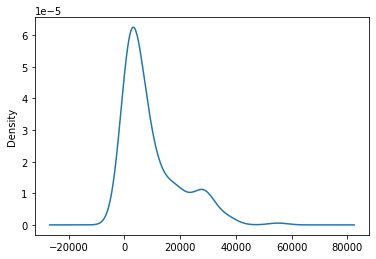

In [49]:
gdp['GDP ($ per capita)'].plot.density()

<AxesSubplot:ylabel='Density'>

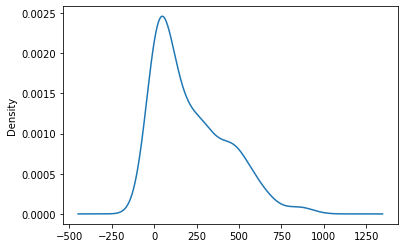

In [50]:
gdp['Phones (per 1000)'].plot.density()

<AxesSubplot:ylabel='Density'>

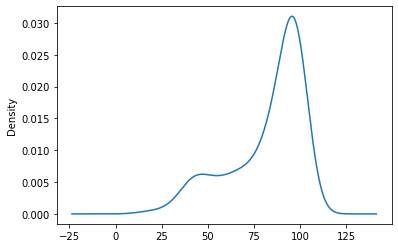

In [51]:
gdp['Literacy (%)'].plot.density()

<AxesSubplot:ylabel='Density'>

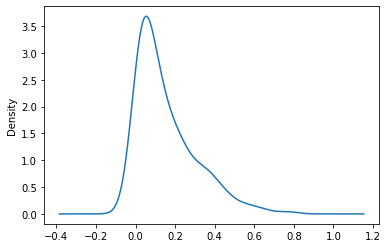

In [52]:
gdp['Agriculture'].plot.density()

<AxesSubplot:ylabel='Density'>

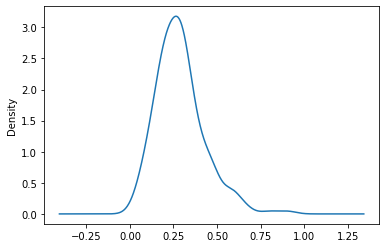

In [53]:
gdp['Industry'].plot.density()

<AxesSubplot:ylabel='Density'>

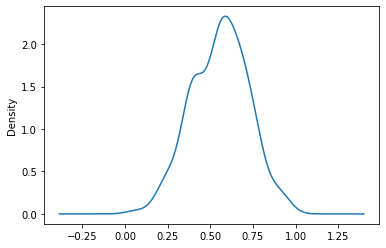

In [54]:
gdp['Service'].plot.density()

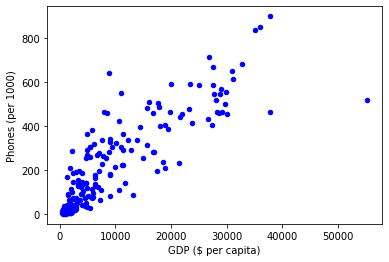

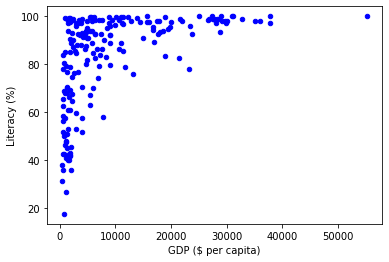

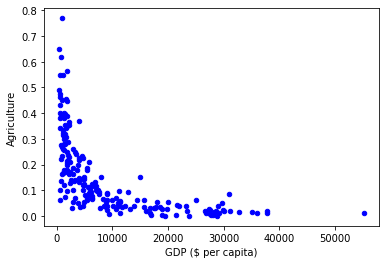

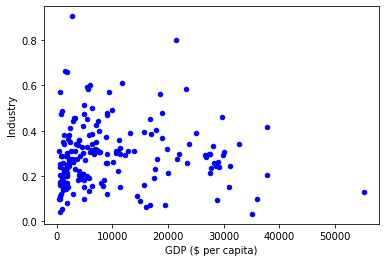

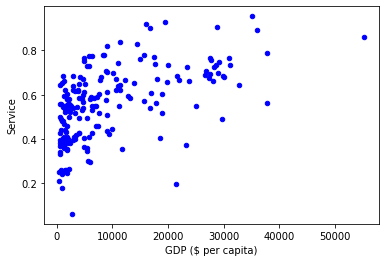

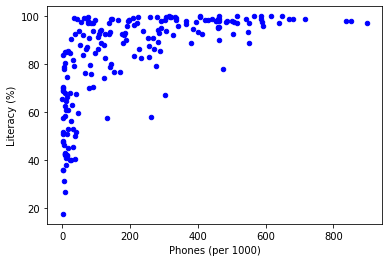

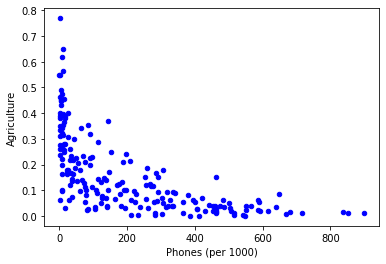

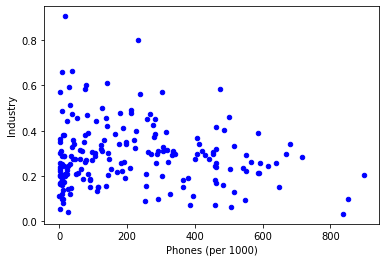

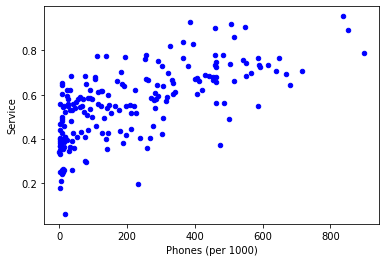

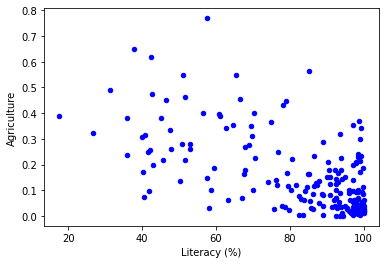

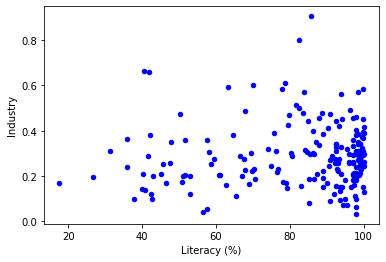

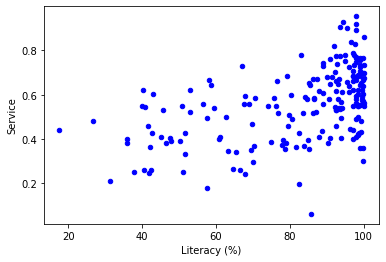

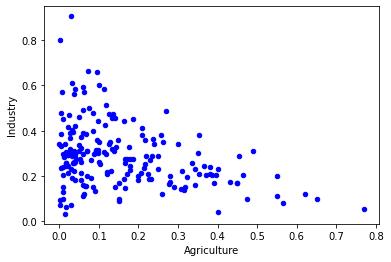

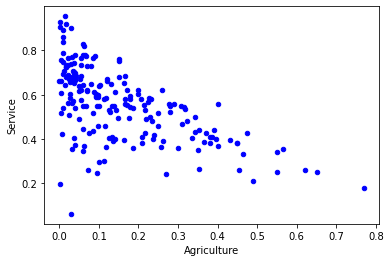

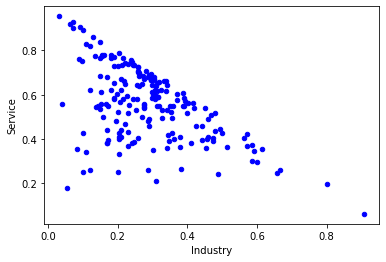

In [55]:
lab = list(gdp.columns.values)
for i in range(len(lab)):
    for j in range (i+1,len(lab)):
        g1 = gdp.plot.scatter(x=lab[i],y=lab[j],c='Blue')

Observaciones:

Es interesante observar como los datos reflejan la desigualdad existente entre diferentes países.

Primero, las distribuciones de cada una de las variables. Observamos que en todos los casos salvo el grado de alfabetización (literacy) la desviación típica es considerable (el ejemplo más llamativo para todos los casos es el PIB per cápita. En este caso, la desviación típica es 10108 y el máximo es 55100). Para confirmar la observación de distribuciones desiguales, vemos que si tomamos el top 5% de los datos, obtenemos cifras muy por debajo del máximo (de nuevo, el PIB per cápita es un buen ejemplo).

Tanto los diagramas de dispersión como la matriz de coeficientes de correlación nos brindan observaciones interesantes también. La más llamativa de estas es seguramente la correlación negativa (en mayor o menor grado) de la agricultura con el resto de variables. Esto es esperable teniendo en cuenta que los mayores exportadores de productos agrícolas son países del llamado "tercer mundo" y no suelen tener otros motores de riqueza, lo que lleva a una población empobrecida y con más probabilidad de ser analfabeta. También es interesante observar la correlación positiva entre Phones (per 1000) y las variables del PIB per cápita y servicios. Esto también es esperable dado que muchos de los países del llamado "primer mundo" suelen tener una economía basada en el sector servicios.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [56]:
min_max_scaler = sk.MinMaxScaler()
standard_scaler = sk.StandardScaler()

def minmax(my_df):
    arr = gdp.values
    res = min_max_scaler.fit_transform(arr)
    return res

def stdscaler(my_df):
    arr = gdp.values
    res = standard_scaler.fit_transform(arr)
    return res


Nota: Aunque tengamos los dos métodos de preprocesado, nos inclinamos por el MinMax dado que las distribuciones de las variables, aunque algunas son más o menos simétricas, ninguna de ellas es normal

In [60]:
stdScaled = stdscaler(gdp)
stdScaled

array([[-0.8620501 , -1.01165988, -2.34013596,  1.51746009, -0.34899036,
        -1.07581243],
       [-0.48516884, -0.68439759,  0.21306793,  0.52275956, -0.7224192 ,
         0.13591728],
       [-0.33639992, -0.65119009, -0.6211472 , -0.35768482,  2.23628625,
        -1.57511813],
       ...,
       [-0.85213218, -0.84802874, -1.62220536, -0.12917253,  1.31707679,
        -0.9966542 ],
       [-0.85213218, -0.98759648, -0.08522717,  0.44210817,  0.01007584,
        -0.41210118],
       [-0.74303497, -0.89808062,  0.4254136 ,  0.16654924, -0.32744639,
         0.13591728]])

In [59]:
minMaxScaled = minmax(gdp)
minMaxScaled

array([[0.003663  , 0.0033415 , 0.22330097, 0.49414824, 0.23798627,
        0.35650224],
       [0.07326007, 0.0790822 , 0.83616505, 0.30169051, 0.1784897 ,
        0.57959641],
       [0.1007326 , 0.08676765, 0.63592233, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.00549451, 0.04121185, 0.39563107, 0.17555267, 0.50343249,
        0.37107623],
       [0.00549451, 0.00891067, 0.76456311, 0.28608583, 0.29519451,
        0.47869955],
       [0.02564103, 0.02962798, 0.88713592, 0.23276983, 0.24141876,
        0.57959641]])

## 4) Encontrar el número óptimo de clusters


Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [63]:
n_clusters_min = 2
n_clusters_max = 10
elbow = list()
davies_boulding = list()
silhouette = list()
for i in range(n_clusters_min,n_clusters_max):
    kmed = skc.KMeans(init='random',n_clusters=i,random_state=random_state)
    kmed.fit(minMaxScaled)
    elbow.append(-1 * kmed.score(minMaxScaled))
    davies_boulding.append(skm.davies_bouldin_score(minMaxScaled,kmed.labels_))
    silhouette.append(skm.silhouette_score(X=minMaxScaled,labels=kmed.labels_,random_state=random_state))


In [64]:
elbow

[27.63345553830825,
 18.25133290308679,
 15.186726730826853,
 13.323649734057827,
 11.797865137610266,
 10.820793014051189,
 10.134643477799447,
 9.160388003442959]

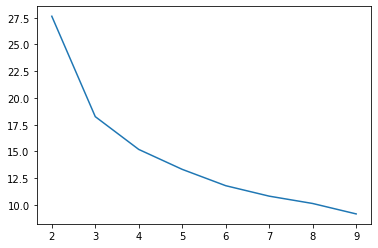

In [71]:
plt.plot(range(n_clusters_min,n_clusters_max),elbow)

In [68]:
davies_boulding

[1.075035582144641,
 0.9812472677840609,
 1.044605386710782,
 1.0979021426542204,
 1.1888860011709252,
 1.2195797382618967,
 1.2143551488956879,
 1.1381044001612635]

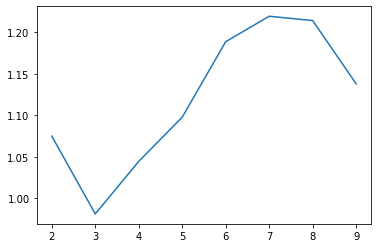

In [70]:
plt.plot(range(n_clusters_min,n_clusters_max),davies_boulding)

In [72]:
silhouette

[0.3422858046639883,
 0.3596852374882149,
 0.3413703283129376,
 0.28965942173833287,
 0.2748126246601284,
 0.2486789403349427,
 0.24570864232140263,
 0.25905795576976237]

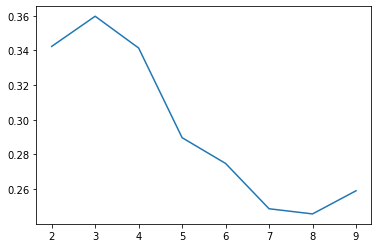

In [73]:
plt.plot(range(n_clusters_min,n_clusters_max),silhouette)

Comprobamos que tanto la mayor variación del diagrama de codo como el máximo de davies_boulding y el mínimo de silhouette se halla en n_clusters=3, de lo que deducimos que 3 es el número óptimo de clusters

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

Nota: Usamos k=3 porque ese fue el número óptimo de clusters hallado en el apartado anterior

In [74]:
kmed = skc.KMeans(init='random',n_clusters=3,random_state=random_state)
kmed.fit(minMaxScaled)
kmed.labels_ ## distribución de los países

array([1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1,
       1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2],
      dtype=int32)

In [77]:
dic = {'Country': df_world['Country'], 'GDP ($ per capita)': df_world['GDP ($ per capita)'], 'Phones (per 1000)': df_world['Phones (per 1000)'], 'Literacy (%)': df_world['Literacy (%)'], 'Agriculture': df_world['Agriculture'], 'Industry': df_world['Industry'], 'Service': df_world['Service']}
gdp = pd.DataFrame(dic).dropna() ## Recuperamos gdp con el nombre de cada país esta vez

gdp['Clusters'] = kmed.labels_
gdp ## Nuevo DataFrame

Country  GDP ($ per capita)  Phones (per 1000)  Literacy (%)  \
0    Afghanistan                700.0                3.2          36.0   
1        Albania               4500.0               71.2          86.5   
2        Algeria               6000.0               78.1          70.0   
5         Angola               1900.0                7.8          42.0   
6       Anguilla               8600.0              460.0          95.0   
..            ...                 ...                ...           ...   
218    Venezuela               4800.0              140.1          93.4   
219      Vietnam               2500.0              187.7          90.3   
224        Yemen                800.0               37.2          50.2   
225       Zambia                800.0                8.2          80.6   
226     Zimbabwe               1900.0               26.8          90.7   

     Agriculture  Industry  Service  Clusters  
0          0.380     0.240    0.380         1  
1          0.232     0.188    0.579         2  
2          0.101     0.600    0.298         2  
5          0.096     0.658    0.246         1  
6          0.040     0.180    0.780         0  
..           ...       ...      ...       ...  
218        0.040     0.419    0.541         2  
219        0.209     0.410    0.381         2  
224        0.135     0.472    0.393         1  
225        0.220     0.290    0.489         2  
226        0.179     0.243    0.579         2  

[196 rows x 8 columns]

In [111]:
def plot_with_colors(my_df,columnName1,columnName2): ## función para mostrar la distribución de las diferentes variables
    clus_zero = my_df.where(my_df['Clusters'] == 0).dropna()
    clus_one = my_df.where(my_df['Clusters'] == 1).dropna()
    clus_two = my_df.where(my_df['Clusters'] == 2).dropna()

    plt.xlabel(columnName1)
    plt.ylabel(columnName2)
    plt.scatter(x=clus_zero[columnName1],y=clus_zero[columnName2],color='red')
    plt.scatter(x=clus_one[columnName1],y=clus_one[columnName2],color='green')
    plt.scatter(x=clus_two[columnName1],y=clus_two[columnName2],color='blue')
    
    plt.show()

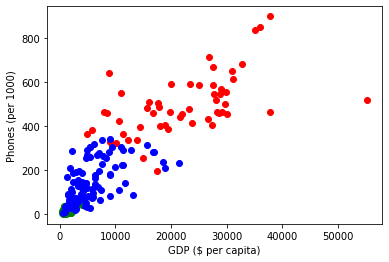

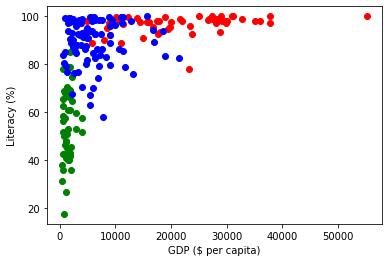

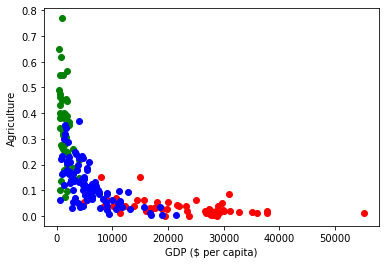

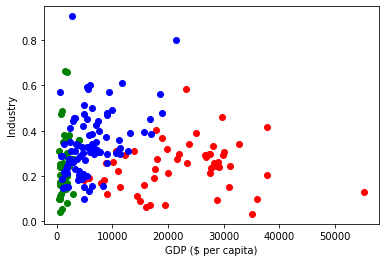

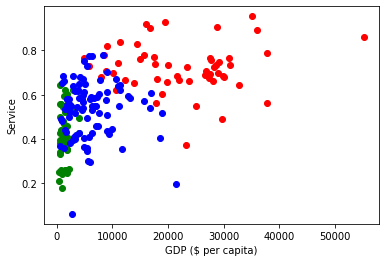

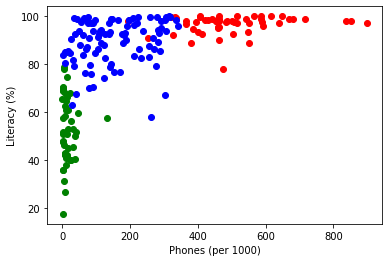

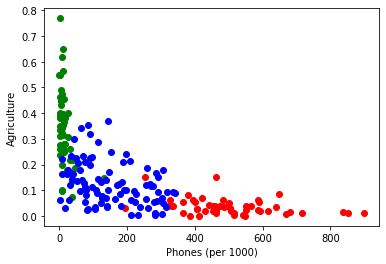

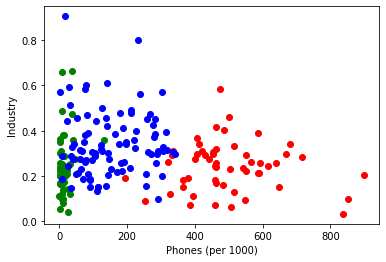

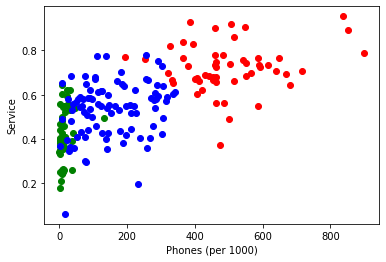

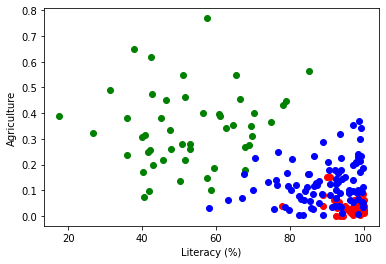

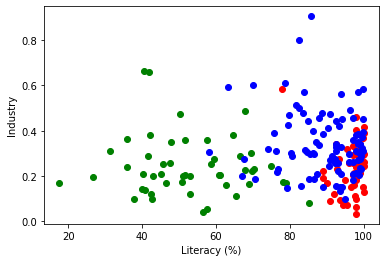

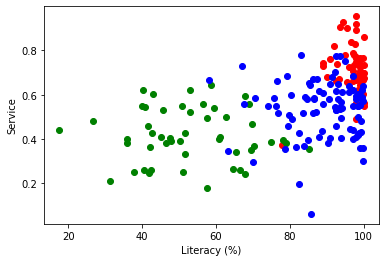

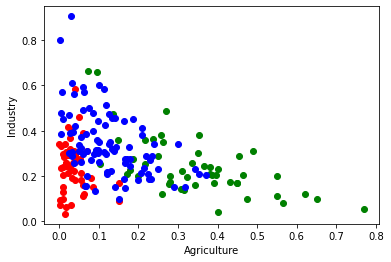

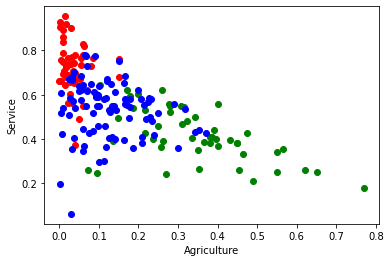

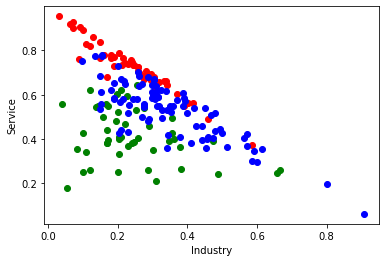

In [115]:
lab = list(gdp.columns.values)
for i in range(1,len(lab)-1):
    for j in range(i+1,len(lab)-1):
        plot_with_colors(gdp,lab[i],lab[j])

Comprobamos por estos diagramas y por lo deducido en el apartado 2 que los países en rojo (el cluster 0) son los países del primer mundo ya que se dan todas las situaciones ya descritas (correlación negativa entre la agricultura y todas las demás por ejemplo). Por otro lado, los países en verde (el cluster 2) son los países del tercer mundo. La variable que nos suele dar la pista sobre a qué cluster puede pertenecer un país es agricultura. Esto no sorprende ya que su correlación con el resto de variables es más acusada y, por lo tanto,más tenderán a separarse los países en clusters.